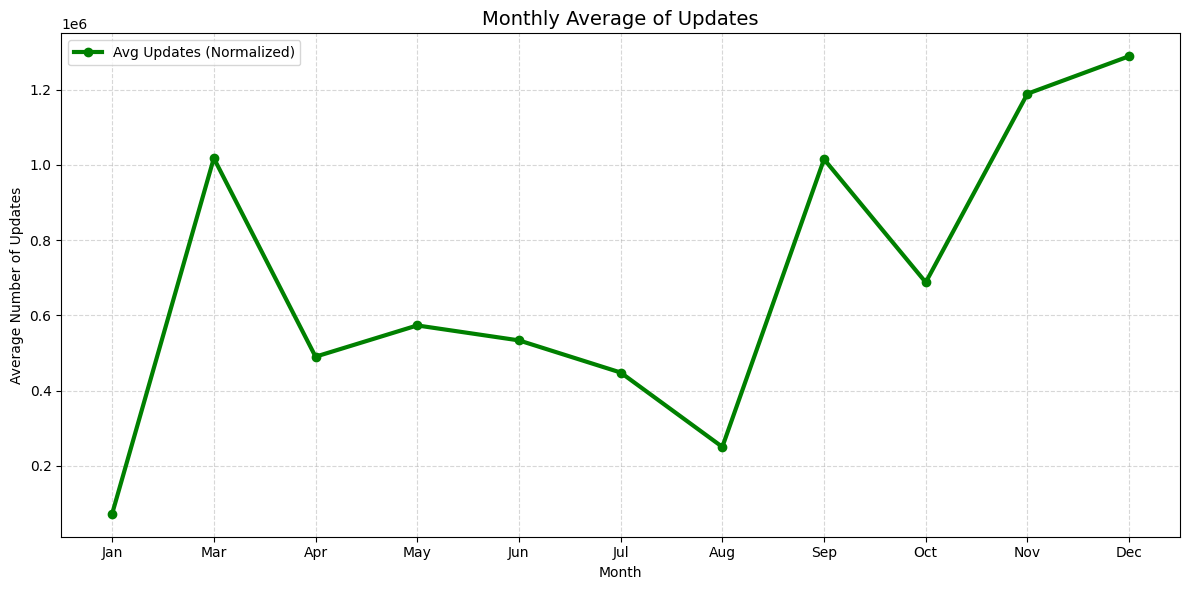

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


bio_path = '65454dab-1517-40a3-ac1d-47d4dfe6891c_fc4f115d100cd65b85f500d6b2cf9aa9.csv'
demo_path = 'up_demographic.csv'
enroll_path = 'UP_enrollment.csv'

df_bio = pd.read_csv(bio_path)
df_demo = pd.read_csv(demo_path)
df_enroll = pd.read_csv(enroll_path)


def process_category(df, value_columns, category_name):
    df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
    df[category_name] = df[value_columns].sum(axis=1)
    df['Month'] = df['date'].dt.month
    return df.groupby('Month')[category_name].sum()

bio_monthly = process_category(df_bio, ['bio_age_5_17', 'bio_age_17_'], 'Biometric')


demo_monthly = process_category(df_demo, ['demo_age_5_17', 'demo_age_17_'], 'Demographic')


enroll_monthly = process_category(df_enroll, ['age_5_17', 'age_18_greater'], 'Enrollment')


combined_df = pd.DataFrame({
    'Biometric': bio_monthly,
    'Demographic': demo_monthly,
    'Enrollment': enroll_monthly
}).fillna(0)

combined_df['Adjusted_Average'] = combined_df.mean(axis=1)
combined_df.index = combined_df.index.map(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Adjusted_Average'], marker='o', color='green', linewidth=3, label='Avg Updates (Normalized)')


plt.title('Monthly Average of Updates', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Number of Updates')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()